In [175]:
import pandas as pd

df = pd.read_csv("obesity_level.csv")

In [176]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,Male,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,Sometimes,0,2.763573,0,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,Frequently,0,2.000000,0,1.000000,1.000000,0,Automobile,0rmal_Weight
2,2,Female,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,Sometimes,0,1.910378,0,0.866045,1.673584,0,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,Sometimes,0,1.674061,0,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,Sometimes,0,1.979848,0,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  int64  
 6   FAVC                            20758 non-null  int64  
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  int64  
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [178]:
df.describe(include='all')

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
count,20758.00000,20758,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758,20758,20758
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,3,5,7
top,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes,NaN,NaN,NaN,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_III
freq,NaN,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17529,NaN,NaN,NaN,NaN,NaN,15066,16687,4046
mean,10378.50000,NaN,23.841804,1.700245,87.887768,0.819636,0.914443,2.445908,2.761332,NaN,0.011803,2.029418,0.033096,0.981747,0.616756,NaN,NaN,NaN
std,5992.46278,NaN,5.688072,0.087312,26.379443,0.384500,0.279716,0.533218,0.705375,NaN,0.108000,0.608467,0.178891,0.838302,0.602113,NaN,NaN,NaN
min,0.00000,NaN,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,5189.25000,NaN,20.000000,1.631856,66.000000,1.000000,1.000000,2.000000,3.000000,NaN,0.000000,1.792022,0.000000,0.008013,0.000000,NaN,NaN,NaN
50%,10378.50000,NaN,22.815416,1.700000,84.064875,1.000000,1.000000,2.393837,3.000000,NaN,0.000000,2.000000,0.000000,1.000000,0.573887,NaN,NaN,NaN
75%,15567.75000,NaN,26.000000,1.762887,111.600553,1.000000,1.000000,3.000000,3.000000,NaN,0.000000,2.549617,0.000000,1.587406,1.000000,NaN,NaN,NaN


### Handling Missing Values

In [179]:
#Check for missing value
df.isnull().sum()
# no missing values

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
0be1dad                           0
dtype: int64

### remove duplicated Rows

In [180]:
df.duplicated().sum()
#no duplicated to remove

0

### Outlier Detection and Removal

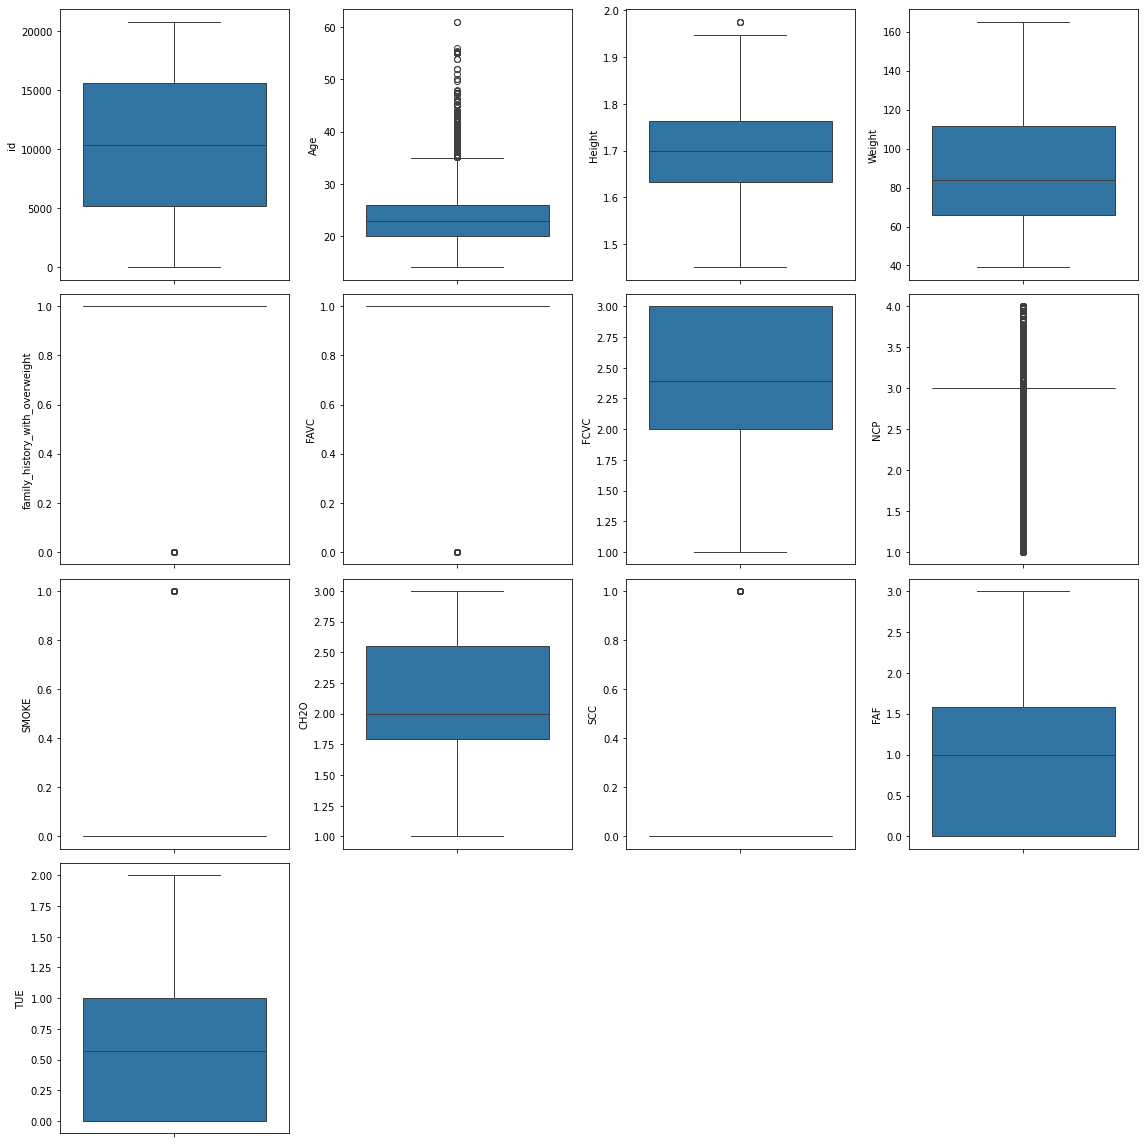

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
numerical_columns = df.select_dtypes(include=[np.number]).columns
# Number of numerical features
num_features = len(numerical_columns)

# Determine grid size
rows = (num_features + 3) // 4  # 4 columns per row
cols = 4
plt.figure(figsize=(16, rows * 4))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)  
    sns.boxplot(data=df, y=col)
    plt.tight_layout()
plt.show()



Outliers in id:
Empty DataFrame
Columns: [id, Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, 0be1dad]
Index: []

Outliers in Age:
          id  Gender        Age    Height      Weight  \
25        25    Male  41.318302  1.853223   96.078462   
48        48  Female  37.000000  1.500000   80.000000   
56        56    Male  55.272573  1.700000   80.000000   
80        80  Female  38.098745  1.560215   80.000000   
83        83    Male  38.000000  1.750000   75.000000   
...      ...     ...        ...       ...         ...   
20715  20715  Female  38.088860  1.750000   62.855073   
20725  20725  Female  38.943282  1.565366   80.000000   
20732  20732  Female  35.389491  1.642506   79.843221   
20739  20739    Male  40.501722  1.619128  109.980145   
20752  20752  Female  40.000000  1.554728   77.561602   

       family_history_with_overweight  FAVC      FCVC       NCP        CAEC  \
25                        

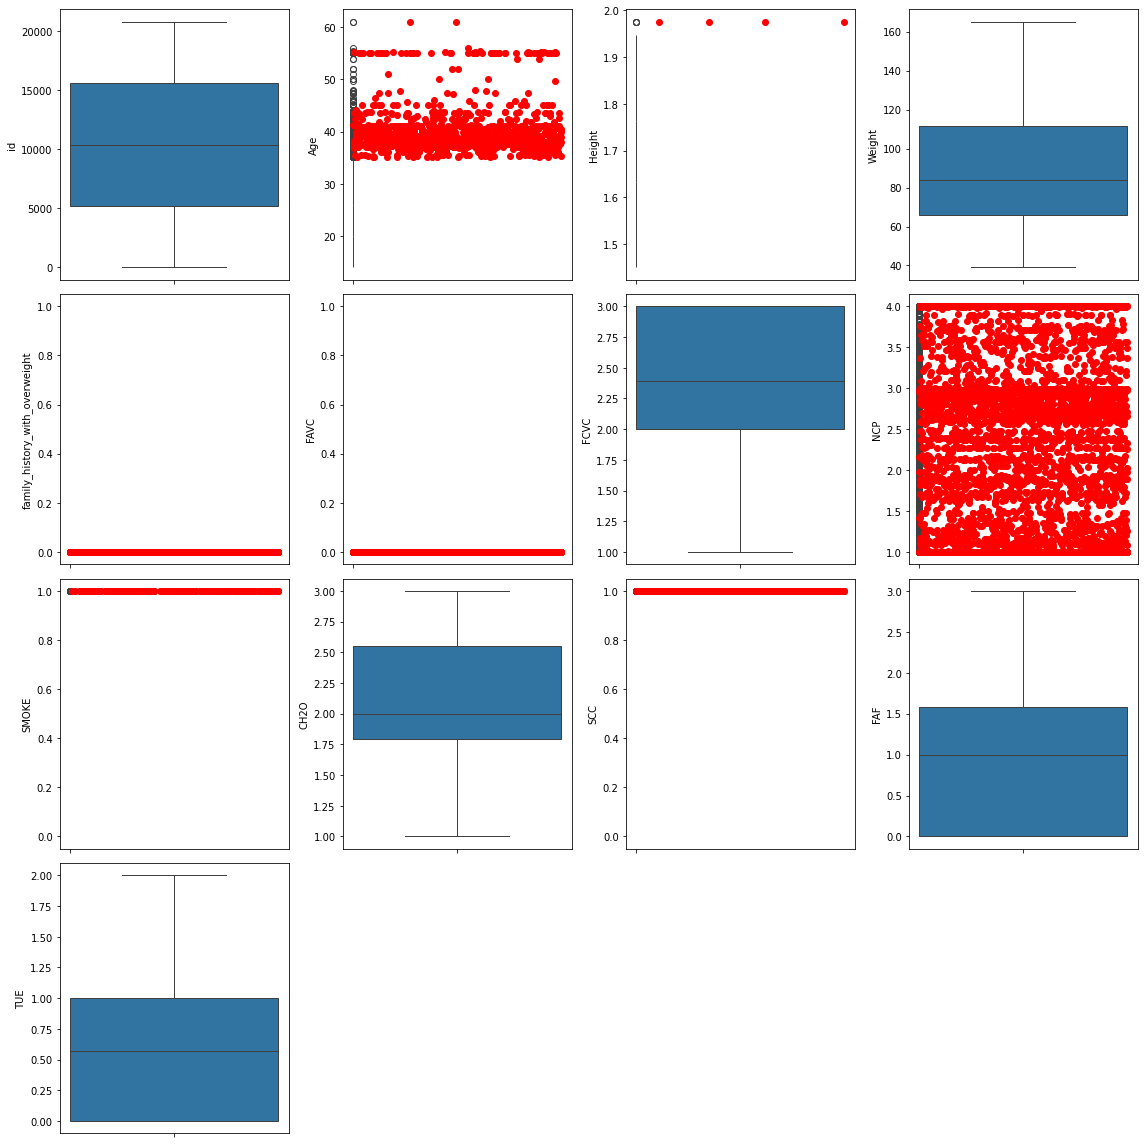

In [182]:
# IQR-based outlier detection
def detect_outliers(df, numerical_columns):
    outliers = {}
    for col in numerical_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        
        # Calculate IQR
        IQR = Q3 - Q1
        
        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers

# Detect outliers in numerical columns
outliers = detect_outliers(df, numerical_columns)

# Display the outliers
for col, data in outliers.items():
    print(f"\nOutliers in {col}:")
    print(data)

# Optionally, plot outliers
plt.figure(figsize=(16, rows * 4))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)  
    sns.boxplot(data=df, y=col)
    
    # Plot the outliers as red dots
    outlier_indices = outliers[col].index
    plt.scatter(outlier_indices, df.loc[outlier_indices, col], color='red', label='Outliers', zorder=5)
    
    plt.tight_layout()
plt.show()

### Encoding Categorical Variables

In [184]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
print(df.head())

   id  Gender        Age    Height      Weight  \
0   0       1  24.443011  1.699998   81.669950   
1   1       0  18.000000  1.560000   57.000000   
2   2       0  18.000000  1.711460   50.165754   
3   3       0  20.952737  1.710730  131.274851   
4   4       1  31.641081  1.914186   93.798055   

   family_history_with_overweight  FAVC      FCVC       NCP  CAEC  SMOKE  \
0                               1     1  2.000000  2.983297     3      0   
1                               1     1  2.000000  3.000000     2      0   
2                               1     1  1.880534  1.411685     3      0   
3                               1     1  3.000000  3.000000     3      0   
4                               1     1  2.679664  1.971472     3      0   

       CH2O  SCC       FAF       TUE  CALC  MTRANS  0be1dad  
0  2.763573    0  0.000000  0.976473     2       3        6  
1  2.000000    0  1.000000  1.000000     0       0        0  
2  1.910378    0  0.866045  1.673584     0       3      

In [185]:
df.head(20)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,3,0,2.763573,0,0.000000,0.976473,2,3,6
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2,0,2.000000,0,1.000000,1.000000,0,0,0
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,3,0,1.910378,0,0.866045,1.673584,0,3,1
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,3,0,1.674061,0,1.467863,0.780199,2,3,4
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,3,0,1.979848,0,1.967973,0.931721,2,3,6
5,5,1,18.128249,1.748524,51.552595,1,1,2.919751,3.000000,3,0,2.137550,0,1.930033,1.000000,2,3,1
6,6,1,29.883021,1.754711,112.725005,1,1,1.991240,3.000000,3,0,2.000000,0,0.000000,0.696948,2,0,3
7,7,1,29.891473,1.750150,118.206565,1,1,1.397468,3.000000,3,0,2.000000,0,0.598655,0.000000,2,0,3
8,8,1,17.000000,1.700000,70.000000,0,1,2.000000,3.000000,3,0,3.000000,1,1.000000,1.000000,0,3,5
9,9,0,26.000000,1.638836,111.275646,1,1,3.000000,3.000000,3,0,2.632253,0,0.000000,0.218645,2,3,4


### Normalization/Scaling

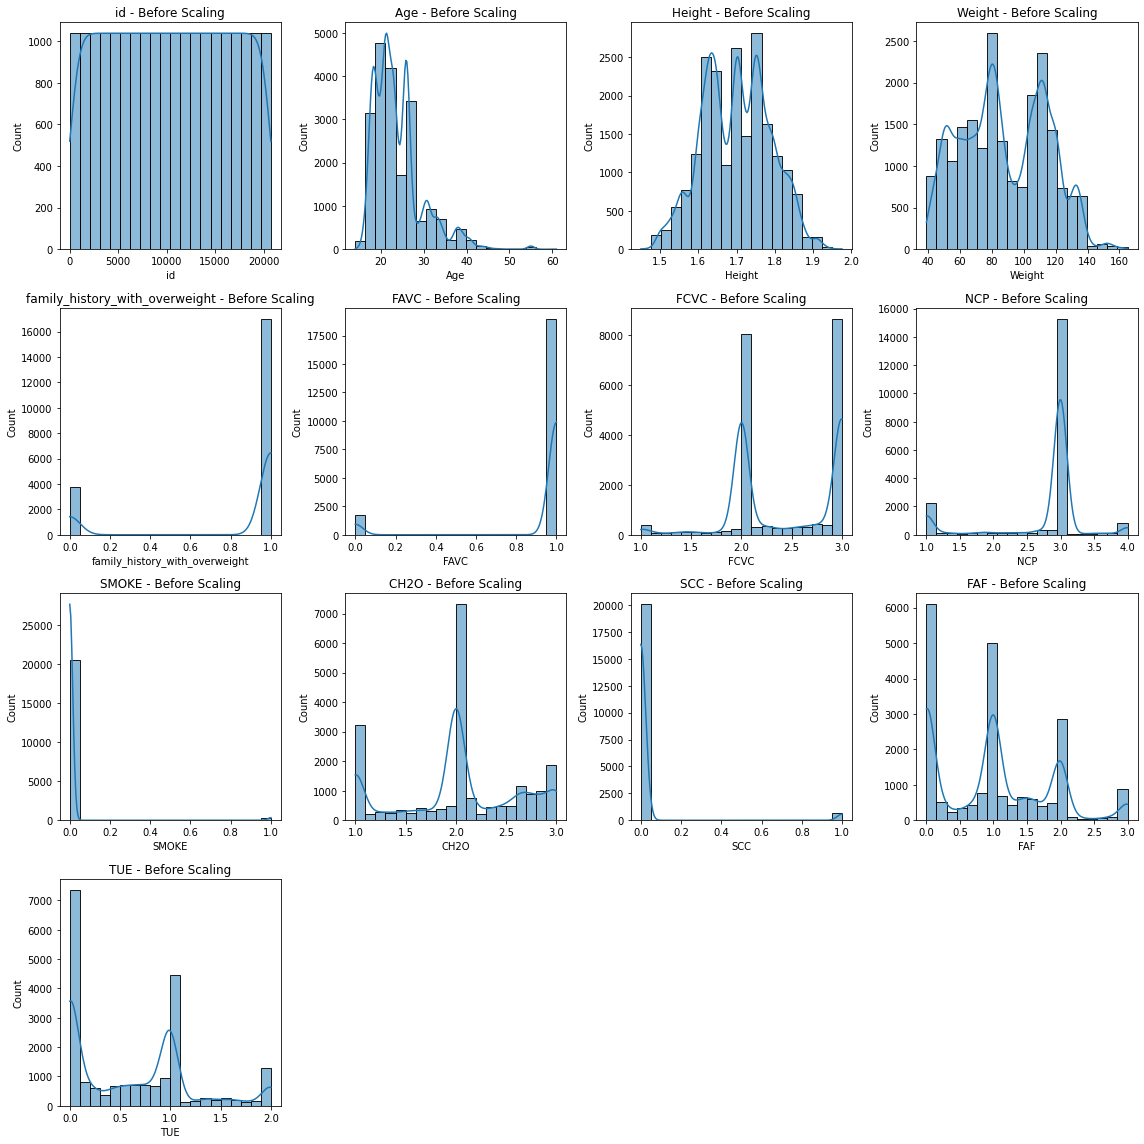

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

num_features = len(numerical_columns)
rows = (num_features + 3) // 4
cols = 4

# Plot histograms before scaling
plt.figure(figsize=(16, rows * 4))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'{feature} - Before Scaling')
plt.tight_layout()
plt.show()

In [187]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
# Displaying the scaled features
print("Scaled Numerical Features:")
print(df[numerical_columns].head())

Scaled Numerical Features:
         id       Age    Height    Weight  family_history_with_overweight  \
0 -1.731967  0.105699 -0.002828 -0.235713                        0.469099   
1 -1.731800 -1.027052 -1.606291 -1.170931                        0.469099   
2 -1.731634 -1.027052  0.128451 -1.430012                        0.469099   
3 -1.731467 -0.507929  0.120090  1.644770                        0.469099   
4 -1.731300  1.371197  2.450367  0.224054                        0.469099   

      FAVC      FCVC       NCP     SMOKE      CH2O       SCC       FAF  \
0  0.30588 -0.836279  0.314684 -0.109287  1.206594 -0.185009 -1.171141   
1  0.30588 -0.836279  0.338364 -0.109287 -0.048349 -0.185009  0.021775   
2  0.30588 -1.060332 -1.913423 -0.109287 -0.195644 -0.185009 -0.138022   
3  0.30588  1.039171  0.338364 -0.109287 -0.584035 -0.185009  0.579896   
4  0.30588  0.438397 -1.119801 -0.109287 -0.081469 -0.185009  1.176486   

        TUE  
0  0.597438  
1  0.636513  
2  1.755239  
3  0.2714

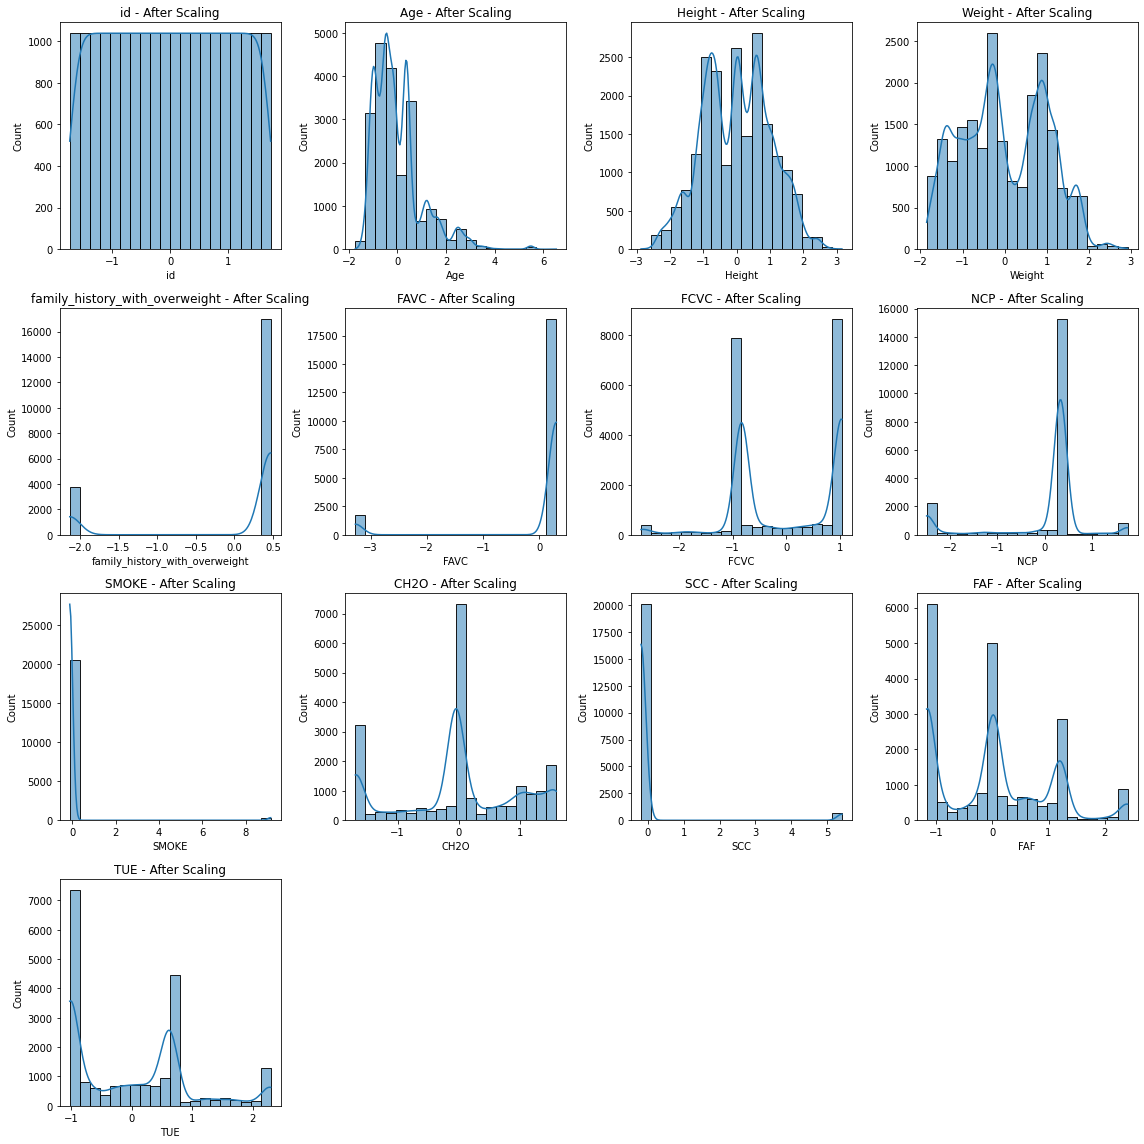

In [188]:
# Plot histograms after scaling
plt.figure(figsize=(16, rows * 4))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'{feature} - After Scaling')
plt.tight_layout()
plt.show()
    

### Correlation Check

In [192]:
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)

                                      id       Age    Height    Weight  \
id                              1.000000  0.007634  0.012041  0.014020   
Age                             0.007634  1.000000 -0.011713  0.283381   
Height                          0.012041 -0.011713  1.000000  0.416677   
Weight                          0.014020  0.283381  0.416677  1.000000   
family_history_with_overweight  0.010482  0.261575  0.228137  0.514147   
FAVC                            0.004156  0.056848  0.115566  0.228770   
FCVC                            0.002098  0.034414 -0.071546  0.245682   
NCP                            -0.000332 -0.048479  0.191383  0.095947   
SMOKE                           0.011544  0.056006  0.069748  0.040416   
CH2O                            0.007917 -0.016325  0.183706  0.317914   
SCC                            -0.011162 -0.108855 -0.095923 -0.185116   
FAF                             0.016719 -0.192259  0.295278 -0.084845   
TUE                             0.0076

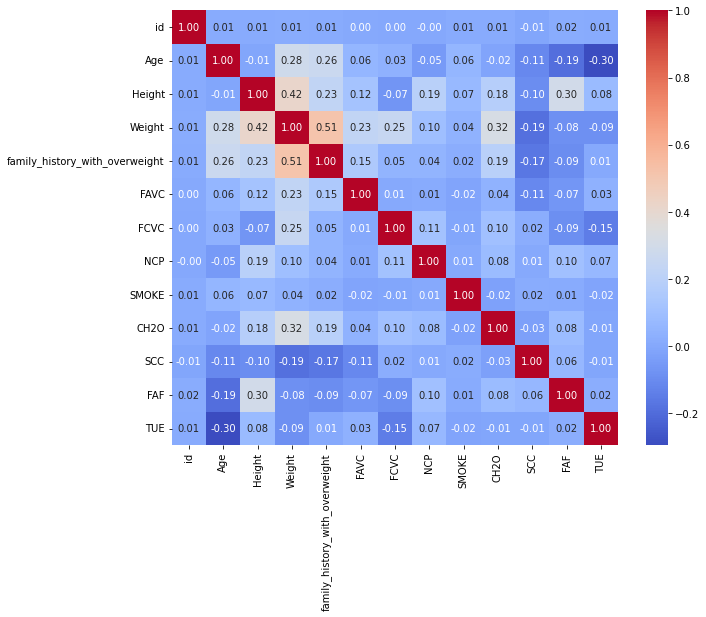

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [189]:
df.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,-1.731967,1,0.105699,-0.002828,-0.235713,0.469099,0.30588,-0.836279,0.314684,3,-0.109287,1.206594,-0.185009,-1.171141,0.597438,2,3,6
1,-1.731800,0,-1.027052,-1.606291,-1.170931,0.469099,0.30588,-0.836279,0.338364,2,-0.109287,-0.048349,-0.185009,0.021775,0.636513,0,0,0
2,-1.731634,0,-1.027052,0.128451,-1.430012,0.469099,0.30588,-1.060332,-1.913423,3,-0.109287,-0.195644,-0.185009,-0.138022,1.755239,0,3,1
3,-1.731467,0,-0.507929,0.120090,1.644770,0.469099,0.30588,1.039171,0.338364,3,-0.109287,-0.584035,-0.185009,0.579896,0.271455,2,3,4
4,-1.731300,1,1.371197,2.450367,0.224054,0.469099,0.30588,0.438397,-1.119801,3,-0.109287,-0.081469,-0.185009,1.176486,0.523111,2,3,6
5,-1.731133,1,-1.004504,0.552963,-1.377438,0.469099,0.30588,0.888668,0.338364,3,-0.109287,0.177716,-0.185009,1.131226,0.636513,2,3,1
6,-1.730966,1,1.062111,0.623825,0.941560,0.469099,0.30588,-0.852708,0.338364,3,-0.109287,-0.048349,-0.185009,-1.171141,0.133187,2,0,3
7,-1.730799,1,1.063597,0.571586,1.149362,0.469099,0.30588,-1.966298,0.338364,3,-0.109287,-0.048349,-0.185009,-0.456996,-1.024344,2,0,3
8,-1.730632,1,-1.202863,-0.002805,-0.678111,-2.131745,0.30588,-0.836279,0.338364,3,-0.109287,1.595165,5.405130,0.021775,0.636513,0,3,5
9,-1.730465,0,0.379434,-0.703345,0.886616,0.469099,0.30588,1.039171,0.338364,3,-0.109287,0.990767,-0.185009,-1.171141,-0.661206,2,3,4


### Clean Dataset

In [193]:
# Dropping original categorical columns and unuseful columns
df = df.drop(columns=['id'])
df.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,0be1dad
0,1,0.105699,-0.002828,-0.235713,0.469099,0.30588,-0.836279,0.314684,3,-0.109287,1.206594,-0.185009,-1.171141,0.597438,2,3,6
1,0,-1.027052,-1.606291,-1.170931,0.469099,0.30588,-0.836279,0.338364,2,-0.109287,-0.048349,-0.185009,0.021775,0.636513,0,0,0
2,0,-1.027052,0.128451,-1.430012,0.469099,0.30588,-1.060332,-1.913423,3,-0.109287,-0.195644,-0.185009,-0.138022,1.755239,0,3,1
3,0,-0.507929,0.120090,1.644770,0.469099,0.30588,1.039171,0.338364,3,-0.109287,-0.584035,-0.185009,0.579896,0.271455,2,3,4
4,1,1.371197,2.450367,0.224054,0.469099,0.30588,0.438397,-1.119801,3,-0.109287,-0.081469,-0.185009,1.176486,0.523111,2,3,6
5,1,-1.004504,0.552963,-1.377438,0.469099,0.30588,0.888668,0.338364,3,-0.109287,0.177716,-0.185009,1.131226,0.636513,2,3,1
6,1,1.062111,0.623825,0.941560,0.469099,0.30588,-0.852708,0.338364,3,-0.109287,-0.048349,-0.185009,-1.171141,0.133187,2,0,3
7,1,1.063597,0.571586,1.149362,0.469099,0.30588,-1.966298,0.338364,3,-0.109287,-0.048349,-0.185009,-0.456996,-1.024344,2,0,3
8,1,-1.202863,-0.002805,-0.678111,-2.131745,0.30588,-0.836279,0.338364,3,-0.109287,1.595165,5.405130,0.021775,0.636513,0,3,5
9,0,0.379434,-0.703345,0.886616,0.469099,0.30588,1.039171,0.338364,3,-0.109287,0.990767,-0.185009,-1.171141,-0.661206,2,3,4


In [194]:
!pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [195]:
from sklearn.model_selection import train_test_split

train_data, validation_data = train_test_split(df, test_size=0.2, random_state=42)



In [196]:
from scipy.io import arff
import pandas as pd

# Function to convert DataFrame to ARFF format and save
def save_to_arff(df, filename, relation_name="data"):
    with open(filename, 'w') as f:
        # Write the ARFF header
        f.write(f"@relation {relation_name}\n\n")
        
        # Define attributes
        for col in df.columns:
            f.write(f"@attribute {col} real\n")
        
        # Write the data section
        f.write("\n@data\n")
        for row in df.values:
            f.write(",".join(map(str, row)) + "\n")


save_to_arff(train_data, 'train_data.arff', "Obesity_Risk_train_data")
save_to_arff(validation_data, 'validation_data.arff', "Obesity_Risk_validation_data")


In [197]:
df.to_csv('cleaned_data.csv', index=False)